In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set(color_codes=True)

In [25]:
data = pd.read_csv('test_regression_practice.csv', parse_dates=[0])
data.head()

,date,AQI_change,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME
0,2020-02-15,0.000000,5.009434,1.207547,16.197861,4.239011,0.264151,-0.505910
1,2020-02-16,6.326448,8.095718,1.536524,19.747875,3.173021,0.335013,-0.747475
2,2020-02-17,7.824512,7.273319,0.650759,30.464072,-1.834211,-22.633406,4.963043
3,2020-02-18,4.111111,0.389899,-0.933198,6.787115,2.857868,-0.668687,0.662626
4,2020-02-19,-1.271042,2.227083,0.534447,10.548023,3.012987,0.314583,0.164583


In [26]:
data.dtypes

date                datetime64[ns]
AQI_change                 float64
RETAIL_REC                 float64
GROCERY_PHARM              float64
PARKS                      float64
TRANSIT_STATIONS           float64
WORK                       float64
HOME                       float64
dtype: object

In [27]:
from sklearn.linear_model import LinearRegression
X = data.drop('RETAIL_REC', GROCERY, axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

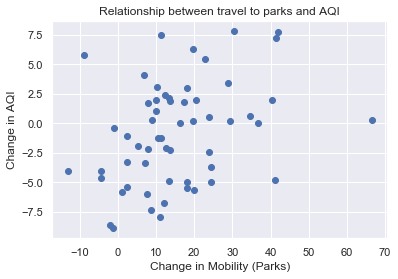

In [30]:
plt.scatter(data.PARKS, data.AQI_change)
plt.xlabel("Change in Mobility (Parks)")
plt.ylabel("Change in AQI")
plt.title("Relationship between travel to parks and AQI")
plt.show()

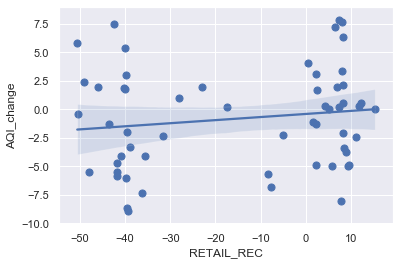

In [32]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="RETAIL_REC", y="AQI_change", data=data, x_estimator=np.mean)
plt.savefig("ChangeInRR.png")

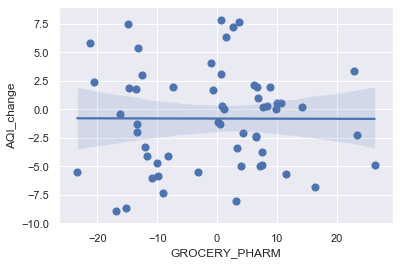

In [9]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="GROCERY_PHARM", y="AQI_change", data=data, x_estimator=np.mean)
plt.savefig("ChangeInGrocPharm.png")

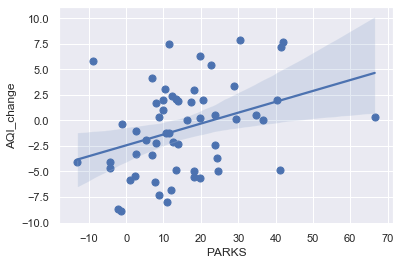

In [10]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="PARKS", y="AQI_change", data=data, x_estimator=np.mean)
plt.savefig("ChangeInParks.png")

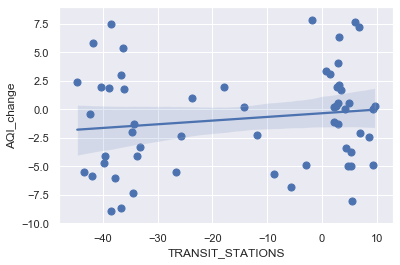

In [11]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="TRANSIT_STATIONS", y="AQI_change", data=data, x_estimator=np.mean)
plt.savefig("ChangeInTransit.png")

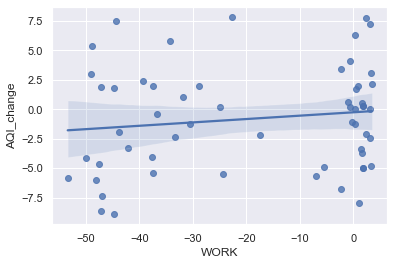

In [12]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="WORK", y="AQI_change", data=data)
plt.savefig("ChangeInWork.png")

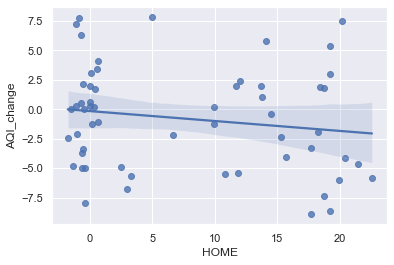

In [13]:
# Collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:
sns.regplot(x="HOME", y="AQI_change", data=data)
plt.savefig("ChangeInHome.png")

In [17]:
data.index = data['date']

In [18]:
data.tail()

,date,AQI_change,RETAIL_REC,GROCERY_PHARM,PARKS,TRANSIT_STATIONS,WORK,HOME
date,,,,,,,,
2020-04-07,2020-04-07,5.400238,-40.096154,-13.251852,22.832192,-36.400560,-48.811905,19.200000
2020-04-08,2020-04-08,3.012617,-39.685579,-12.608802,18.102649,-36.737430,-49.095794,19.228972
2020-04-09,2020-04-09,-4.097579,-40.814634,-11.685000,-4.380952,-39.700855,-49.953995,20.435835
2020-04-10,2020-04-10,-5.803704,-41.826733,-9.870000,1.160991,-42.062323,-53.414815,22.577778
2020-04-11,2020-04-11,1.985185,-45.905983,-7.339031,9.919355,-40.366771,-37.481481,13.658120


In [19]:
#The following function uses StatsModels to put a smooth curve through a time series (and stuff the results back into a Pandas Series)

from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)
    
    return pd.Series(data, index=pd.to_datetime(index))

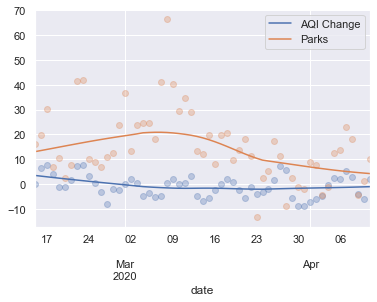

In [20]:
options = dict(marker='o', linewidth=0, alpha=0.3, label='')

data['AQI_change'].plot(color='C0', **options)
data['PARKS'].plot(color='C1', **options)

AQI = make_lowess(data['AQI_change'])
AQI.plot(label='AQI Change')

mobility1 = make_lowess(data['PARKS'])
mobility1.plot(label='Parks')

plt.legend();